# Explore the results of the given examples

### Import the required packages and disable some expected warnings

In [1]:
import logging

from morphio import set_ignored_warning
from morphio import Warning
from neurom import load_morphology
from neurom.view import plotly_impl

logging.getLogger("neurots.generate.grower").disabled = True
set_ignored_warning([Warning.zero_diameter], True)

### Run the example extract_synthesis_inputs.py and plot the result

In [ ]:
# Create 100 Neurons from C220197A-P2 https://neuromorpho.org/KeywordResult.jsp?count=1&keywords=%22C220197A-P2%22

In [2]:
import neurots
from neurots import extract_input
import json


def extract_distr_and_param(output_dir, data_dir):
    # Generate distribution from directory of neurons
    distr = extract_input.distributions(
        data_dir / "neurons", feature="path_distances", diameter_model="default"
    )

    # Save distributions in a json file
    with open(output_dir / f"bio612/test_distr.json", "w", encoding="utf-8") as f:
        json.dump(distr, f, sort_keys=True, indent=2)

    # Generate default parameters for topological synthesis of basal dendrites
    params = extract_input.parameters(feature="path_distances", method="tmd")

    # Save parameters in a json file
    with open(output_dir / f"bio612/test_params.json", "w", encoding="utf-8") as f:
        json.dump(params, f, sort_keys=True, indent=2)

In [3]:
# extract_synthesis_inputs.py
def generate_cell(output_dir, data_dir, nb_cells):
    # Re-load data from saved distributions
    with open(output_dir / f"bio612/test_distr.json", "r", encoding="utf-8") as F:
        distr = json.load(F)

    # Re-load data from saved parameters
    with open(output_dir / f"bio612/test_params.json", "r", encoding="utf-8") as F:
        params = json.load(F)

    for i in range(nb_cells):
        # Initialize a neuron
        N = neurots.NeuronGrower(input_distributions=distr, input_parameters=params)

        # Grow the neuron
        neuron = N.grow()

        # Export the synthesized cell
        neuron.write(output_dir / f"bio612/generated_cell_{i}.asc")

In [41]:
from pathlib import Path 

output_dir = Path("results_extract_synthesis_inputs")
data_dir   = Path("data")

# Extract the distribution and parameters from neuron data/neurons/C220197A-P2.h5
extract_distr_and_param(output_dir, data_dir)

# Create 100 neurons
generate_cell(output_dir, data_dir, nb_cells=100)

In [4]:
import os 

folder = "results_extract_synthesis_inputs/bio612"
filenames = os.listdir(folder)
filenames =[file for file in filenames if ".asc" in file]

print(filenames)

['generated_cell_86.asc', 'generated_cell_34.asc', 'generated_cell_63.asc', 'generated_cell_17.asc', 'generated_cell_53.asc', 'generated_cell_43.asc', 'generated_cell_15.asc', 'generated_cell_85.asc', 'generated_cell_18.asc', 'generated_cell_13.asc', 'generated_cell_93.asc', 'generated_cell_94.asc', 'generated_cell_11.asc', 'generated_cell_45.asc', 'generated_cell_29.asc', 'generated_cell_78.asc', 'generated_cell_47.asc', 'generated_cell_48.asc', 'generated_cell_33.asc', 'generated_cell_7.asc', 'generated_cell_0.asc', 'generated_cell_20.asc', 'generated_cell_55.asc', 'generated_cell_73.asc', 'generated_cell_90.asc', 'generated_cell_97.asc', 'generated_cell_95.asc', 'generated_cell_32.asc', 'generated_cell_75.asc', 'generated_cell_76.asc', 'generated_cell_62.asc', 'generated_cell_64.asc', 'generated_cell_74.asc', 'generated_cell_14.asc', 'generated_cell_9.asc', 'generated_cell_81.asc', 'generated_cell_4.asc', 'generated_cell_52.asc', 'generated_cell_88.asc', 'generated_cell_57.asc', 'ge

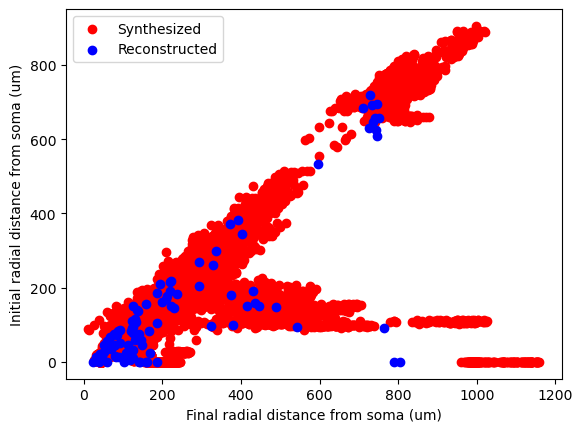

In [5]:
import tmd
import matplotlib.pyplot as plt
import numpy as np


points_all = np.empty((0, 2))
for i in range(len(filenames)):
    neuron = tmd.io.load_neuron_from_morphio("results_extract_synthesis_inputs/bio612/" + filenames[i])
    points = tmd.methods.get_ph_neuron(neuron, feature="radial_distances")
    points_all = np.append(points_all, np.array(points), axis=0)

plt.scatter(points_all[:, 0], points_all[:, 1], c='red', label='Synthesized')
plt.xlabel('Final radial distance from soma (um)')
plt.ylabel('Initial radial distance from soma (um)')

neuron = tmd.io.load_neuron_from_morphio("data/neurons/C220197A-P2.h5")
points = tmd.methods.get_ph_neuron(neuron, feature="radial_distances")
points = np.array(points)
plt.scatter(points[:, 0], points[:, 1], c='blue', label='Reconstructed')
plt.legend()

In [6]:
import morphio
from neurom.core.morphology import Morphology
from neurom.core.population import Population
from neurom.io.utils import load_morphologies
from collections import defaultdict
import neurom as nm

# Neurite types of interest
NEURITES_ = (nm.NeuriteType.apical_dendrite,
             nm.NeuriteType.basal_dendrite)


# Features of interest
FEATURES = ('number_of_neurites', 
            'number_of_sections', 
            'section_term_lengths', 
            'number_of_bifurcations',
            'section_lengths',
            'section_tortuosity', 
            'section_radial_distances',
            'section_path_distances',
            'section_branch_orders', 
            'local_bifurcation_angles')

def load_neurite_features_pop(filepath):
    """Unpack relevant data into megadict."""
    stuff = defaultdict(lambda: defaultdict(list))
    morphs = nm.load_morphologies(filepath)
    # unpack data into arrays
    for t in NEURITES_:
        for feat in FEATURES:

            stuff[feat][str(t).split('.')[1]].extend(
                nm.get(feat, morphs, neurite_type=t)
            )
    return stuff



features_synth = load_neurite_features_pop(folder)
features_reco  = load_neurite_features_pop("data/neurons/C220197A-P2.h5")

In [44]:
features_reco

defaultdict(<function __main__.load_neurite_features_pop.<locals>.<lambda>()>,
            {'number_of_neurites': defaultdict(list,
                         {'apical_dendrite': [1], 'basal_dendrite': [9]}),
             'number_of_sections': defaultdict(list,
                         {'apical_dendrite': [59], 'basal_dendrite': [73]}),
             'section_term_lengths': defaultdict(list,
                         {'apical_dendrite': [141.00261,
                           158.35632,
                           81.449326,
                           76.02641,
                           158.87155,
                           226.35625,
                           101.81026,
                           47.372047,
                           124.92018,
                           22.216572,
                           18.959015,
                           43.70549,
                           153.12616,
                           32.80848,
                           95.48405,
                       

In [7]:
feat_list = ['number_of_neurites', 
            'number_of_sections', 
            'section_term_lengths', 
            'number_of_bifurcations',
            'section_lengths',
            'section_tortuosity', 
            'section_radial_distances',
            'section_path_distances',
            'section_branch_orders', 
            'local_bifurcation_angles']
            
def get_features_medians(object1, object2, flist=feat_list, neurite_type=nm.BASAL_DENDRITE):
    """Computes features from module mod"""
    collect_all = []

    for feat in flist:
        feature_pop = [np.median(nm.get(feat, obj, neurite_type=neurite_type)) for obj in object1]
        feature_neu = [np.median(nm.get(feat, obj, neurite_type=neurite_type)) for obj in object2]
        collect_all.append([feature_pop, feature_neu])

    return collect_all

def get_features_std(object, flist=feat_list, neurite_type=nm.BASAL_DENDRITE):
    """Computes features from module mod"""
    collect_all = []

    for feat in flist:
        feature_pop = [np.std(nm.get(feat, obj, neurite_type=neurite_type)) for obj in object]
        collect_all.append(feature_pop)

    return collect_all

def get_features(object1, object2, flist=feat_list, neurite_type=nm.BASAL_DENDRITE):
    """Computes features from module mod"""
    collect_all = []

    for feat in flist:
        feature_pop = nm.get(feat, object1, neurite_type=neurite_type)
        feature_neu = nm.get(feat, object2, neurite_type=neurite_type)

        collect_all.append([feature_pop, feature_neu])

    return collect_all
    
morphs     = nm.load_morphologies(folder)
morph_reco = nm.load_morphologies("data/neurons/C220197A-P2.h5")
med             = get_features_medians(morphs, morph_reco, flist=feat_list, neurite_type=nm.BASAL_DENDRITE)
std             = get_features_std(morph_reco, flist=feat_list, neurite_type=nm.BASAL_DENDRITE)
features_basal  = get_features(morphs, morph_reco, flist=feat_list, neurite_type=nm.BASAL_DENDRITE)
features_apical = get_features(morphs, morph_reco, flist=feat_list, neurite_type=nm.APICAL_DENDRITE)

In [24]:
features_apical_arr = np.array(features_apical, dtype=object)
print(np.linspace(0, features_apical_arr.shape[0]+1, int(features_apical_arr.shape[0]/2)))
plt.bar(np.linspace(0, features_apical_arr.shape[0], 2), np.mean(features_apical_arr[i, 0]), label='synthesized')
plt.bar(np.linspace(1, features_apical_arr.shape[0]+1, 2), np.mean(features_apical_arr[i, 1]), label='reco')


plt.legend()

[ 0.    2.75  5.5   8.25 11.  ]


IndexError: index 99 is out of bounds for axis 0 with size 10

In [48]:
features_synth.keys()

dict_keys(['number_of_neurites', 'number_of_sections', 'section_term_lengths', 'number_of_bifurcations', 'section_lengths', 'section_tortuosity', 'section_radial_distances', 'section_path_distances', 'section_branch_orders', 'local_bifurcation_angles'])

In [12]:
features_synth['number_of_neurites']['basal_dendrite']

100

In [62]:
pd_synth = pd.DataFrame(features_synth)
pd_synth

,number_of_neurites,number_of_sections,section_term_lengths,number_of_bifurcations,section_lengths,section_tortuosity,section_radial_distances,section_path_distances,section_branch_orders,local_bifurcation_angles
apical_dendrite,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 5...","[12.432373, 16.392633, 62.02941, 55.534485, 31...","[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...","[25.705818, 17.41725, 12.775259, 30.818356, 12...","[1.0646628, 1.0592147, 1.0532728, 1.0315884, 1...","[24.144562, 39.95813, 51.926907, 80.98216, 88....","[25.70581817626953, 43.12306785583496, 55.8983...","[0, 1, 2, 3, 4, 5, 6, 6, 7, 7, 5, 4, 5, 6, 7, ...","[0.20154564100258426, 0.20791902119537878, 0.2..."
basal_dendrite,"[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...","[111, 101, 115, 101, 107, 97, 99, 113, 125, 12...","[94.85574, 105.958305, 88.47128, 2.361766, 6.2...","[51, 46, 53, 46, 49, 44, 45, 52, 58, 58, 50, 2...","[3.6541977, 33.970695, 22.206627, 94.85574, 10...","[1.013929, 1.0559512, 1.0574225, 1.0649202, 1....","[3.6039977, 35.684605, 56.06244, 120.439156, 1...","[3.6541976928710938, 37.62489318847656, 59.831...","[0, 1, 2, 3, 3, 2, 3, 3, 4, 4, 1, 0, 1, 2, 3, ...","[0.14952769543837885, 0.12612843122573236, 0.2..."


In [66]:
list(pd_synth), list(pd_synth.index)

(['number_of_neurites',
  'number_of_sections',
  'section_term_lengths',
  'number_of_bifurcations',
  'section_lengths',
  'section_tortuosity',
  'section_radial_distances',
  'section_path_distances',
  'section_branch_orders',
  'local_bifurcation_angles'],
 ['apical_dendrite', 'basal_dendrite'])

In [70]:
list(a)

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9,
  9]

In [76]:
type(pd_synth.unstack())

number_of_neurites        apical_dendrite    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
                          basal_dendrite     [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...
number_of_sections        apical_dendrite    [59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 5...
                          basal_dendrite     [111, 101, 115, 101, 107, 97, 99, 113, 125, 12...
section_term_lengths      apical_dendrite    [12.432373, 16.392633, 62.02941, 55.534485, 31...
                          basal_dendrite     [94.85574, 105.958305, 88.47128, 2.361766, 6.2...
number_of_bifurcations    apical_dendrite    [29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 2...
                          basal_dendrite     [51, 46, 53, 46, 49, 44, 45, 52, 58, 58, 50, 2...
section_lengths           apical_dendrite    [25.705818, 17.41725, 12.775259, 30.818356, 12...
                          basal_dendrite     [3.6541977, 33.970695, 22.206627, 94.85574, 10...
section_tortuosity        apical_dendrite    [1.06

In [75]:
a = pd_synth.unstack()
list(a.index)

# function that converts tuple to string
def join_tuple_string(strings_tuple) -> str:
   return ' '.join(strings_tuple)

# joining all the tuples
result = map(join_tuple_string, list(a.index))
print(list(result))
a = a.reindex(list(result))
a

['number_of_neurites apical_dendrite', 'number_of_neurites basal_dendrite', 'number_of_sections apical_dendrite', 'number_of_sections basal_dendrite', 'section_term_lengths apical_dendrite', 'section_term_lengths basal_dendrite', 'number_of_bifurcations apical_dendrite', 'number_of_bifurcations basal_dendrite', 'section_lengths apical_dendrite', 'section_lengths basal_dendrite', 'section_tortuosity apical_dendrite', 'section_tortuosity basal_dendrite', 'section_radial_distances apical_dendrite', 'section_radial_distances basal_dendrite', 'section_path_distances apical_dendrite', 'section_path_distances basal_dendrite', 'section_branch_orders apical_dendrite', 'section_branch_orders basal_dendrite', 'local_bifurcation_angles apical_dendrite', 'local_bifurcation_angles basal_dendrite']


Series([], dtype: object)

/tmp/ipykernel_98175/54291752.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,apical_dendrite,basal_dendrite,apical_dendrite,basal_dendrite
number_of_neurites,1.0,9.0,1.0,9.0
number_of_sections,59.0,102.22,59.0,73.0
section_term_lengths,97.558792,74.526955,90.349632,71.075294
number_of_bifurcations,29.0,46.61,29.0,32.0
section_lengths,70.516525,52.315063,70.348816,53.108974
section_tortuosity,1.066943,1.057118,1.325425,1.244207
section_radial_distances,362.48175,85.631325,318.746399,71.471443
section_path_distances,419.982496,98.99044,420.923852,99.719076
section_branch_orders,8.557627,2.832714,8.237288,2.410959
local_bifurcation_angles,0.157904,0.134417,1.268293,1.290419


<Axes: >

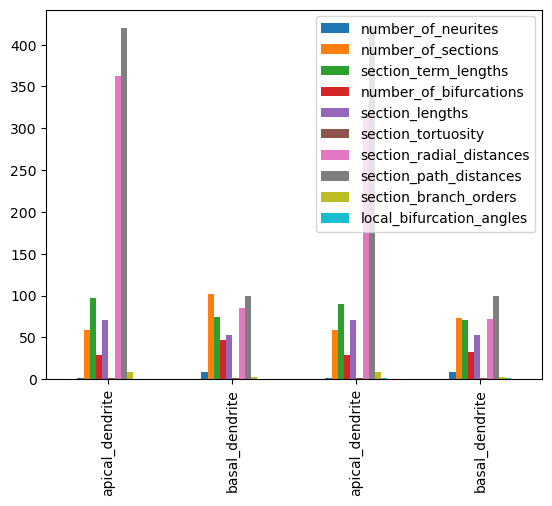

In [60]:
import pandas as pd
import seaborn as sns

pd_synth = pd.DataFrame(features_synth)
pd_reco  = pd.DataFrame(features_reco)

pd_all = pd_synth_mean
pd_all.set_index('type')
pd_all = pd_all.append(pd_reco_mean)
display(pd_all.T)

pd_all.plot.bar(y=features_synth.keys())

In [35]:
pd_synth.loc[:,'number_of_neurites']

apical_dendrite    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
basal_dendrite     [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...
Name: number_of_neurites, dtype: object

In [44]:
pd_synth_mean = pd_synth
pd_reco_mean  = pd_reco

for row in list(pd_synth.index):
    for col in  list(pd_synth):
        pd_synth_mean.loc[row, col] = np.mean(pd_synth.loc[row, col])
        pd_reco_mean.loc[row, col] = np.mean(pd_reco.loc[row, col])

pd_synth_mean['type'] = ['synthesized', 'synthesized']
pd_reco_mean['type']  = ['reconstructed', 'reconstructed']

In [65]:
# Neurite types of interest
NEURITES_ = (nm.NeuriteType.apical_dendrite,
             nm.NeuriteType.basal_dendrite)


# Features of interest
FEATURES = ('segment_lengths',
            'section_lengths',
            'section_path_distances',
            'section_radial_distances',
            'trunk_origin_radii')


def load_neurite_features(filepath):
    """Unpack relevant data into megadict."""
    stuff = defaultdict(lambda: defaultdict(list))
    morphs = nm.load_morphologies(filepath)
    # unpack data into arrays
    for m in morphs:
        for t in NEURITES_:
            for feat in FEATURES:
                stuff[feat][str(t).split('.')[1]].extend(
                    nm.get(feat, m, neurite_type=t)
                )
    return stuff

<bound method get_bounding_box of <tmd.Neuron.Neuron.Neuron object at 0x7f18ee0fe770>>

### Run the example synthesize_single_neuron.py and plot the result

In [3]:
%run synthesize_single_neuron.py

morph = load_morphology("results_single_neuron/generated_cell.swc")
_ = plotly_impl.plot_morph3d(morph, inline=True)

JSONDecodeError: Expecting ',' delimiter: line 339 column 1 (char 8011)

RawDataError: File: results_single_neuron/generated_cell.swc does not exist.

### Run the example synthesize_neurons.py and plot the result

In [ ]:
%run synthesize_neurons.py

for i in range(10):
    morph = load_morphology(f"results_neurons/generated_cell_{i}.swc")
    _ = plotly_impl.plot_morph3d(morph, inline=True)

### Run the example synthesize_neuron_with_diameters.py and plot the result

In [ ]:
%run synthesize_neuron_with_diameters.py

morph = load_morphology("results_neuron_with_diameters/generated_cell.swc")
_ = plotly_impl.plot_morph3d(morph, inline=True)

### Run the example synthesize_neuron_external_diameter.py and plot the result

In [ ]:
%run synthesize_neuron_external_diameter.py

morph = load_morphology("results_neuron_external_diameter/generated_cell.swc")
_ = plotly_impl.plot_morph3d(morph, inline=True)